In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


### As this data is the data of the women weight and height we will like to  predict the weight for the person on the bases of the Height

In [6]:
df.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


# Data Visualization 

In [7]:
## Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

C:\Users\vishal\Anaconda4\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


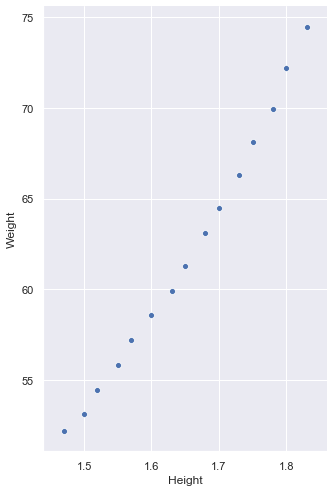

In [8]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Height'], y_vars='Weight',size=7, aspect=0.7, kind='scatter')


Perfroming Simple Linear Regression

Equation of linear regression
𝑦=𝑐+
𝑚
1
𝑥
1
+
𝑚
2
𝑥
2
+...+
𝑚
𝑛
𝑥
𝑛
y=c+m1x1+m2x2+...+mnxn
𝑦
y
is the response
𝑐
c
is the intercept
𝑚
1
m1
is the coefficient for the first feature
𝑚
𝑛
mn
is the coefficient for the nth feature
In our case:
𝑦=𝑐+
𝑚
1
×𝑇𝑉
y=c+m1×TV
The 
𝑚
m
values are called the model coefficients or model parameters.

Generic Steps in Model Building using sklearn
Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows: 

Preparing X and y
The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
However, X can be a dataframe as Pandas is built over NumPy.

In [9]:
# Perfroming Simple Linear Regression

In [15]:
# Putting feature variable to X
X = df['Height']

# Print the first 5 rows
X.head()

0    1.47
1    1.50
2    1.52
3    1.55
4    1.57
Name: Height, dtype: float64

In [16]:
# Putting response variable to y
y = df['Weight']

# Print the first 5 rows
y.head()

0    52.21
1    53.12
2    54.48
3    55.84
4    57.20
Name: Weight, dtype: float64

In [18]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=0)

In [19]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [20]:
train_test_split   #Press Tab to auto-fill the code
#Press Tab+Shift to read the documentation

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10,)
(10,)
(5,)
(5,)


In [22]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'Height'.

import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10, 1)
(10,)
(5, 1)
(5,)


# Performing the Linear Regression

In [24]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

-36.76345330739302
[59.90953307]


In [26]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [27]:
type(y_pred)

numpy.ndarray

Text(0, 0.5, 'Sales')

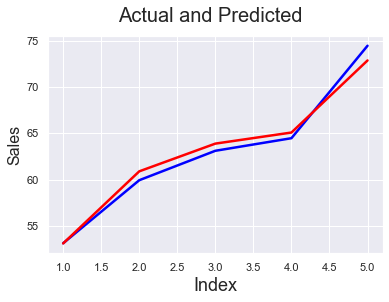

In [29]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,6,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

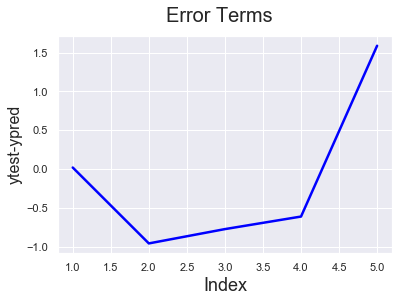

In [30]:
# Error terms
c = [i for i in range(1,6,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [32]:
r_squared = r2_score(y_test, y_pred)

In [33]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.884114123661966
r_square_value : 0.9816224797640156


Text(0, 0.5, 'Predicted Y')

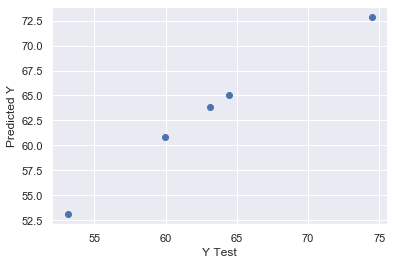

In [34]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [38]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9816224797640156

In [39]:
print(lr.predict([[1.68]]))

[63.88456226]
